# Utilisation des scripts

Ce notebook vise à montrer l'utilisation des scripts du projet afin d'effectuer un entrainement et une inférence.

In [1]:
%%shell

nvidia-smi

Tue Aug 31 12:40:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Installation du projet `bfc` et accès aux données

Les login et mot de passe sont nécessaires pour accéder à des repos privés à partir de Google/Colab. Cela ne serait pas le cas en accès public.

In [2]:
import os
from getpass import getpass

In [3]:
user = getpass('GitHub user')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password

GitHub user··········
GitHub password··········


In [4]:
%%shell

git clone https://$GITHUB_AUTH@github.com/tibocour/IA.git

Cloning into 'IA'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 86 (delta 36), reused 70 (delta 20), pack-reused 0
Unpacking objects: 100% (86/86), done.


# Installation des dépendances

In [5]:
%%shell

pip install -r IA/requirements.txt

     |████████████████████████████████| 620 kB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 27.3 MB/s 
     |████████████████████████████████| 840 kB 45.2 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 211 kB 45.9 MB/s 
     |████████████████████████████████| 1.1 MB 39.0 MB/s 
     |████████████████████████████████| 120 kB 48.3 MB/s 
     |████████████████████████████████| 636 kB 44.1 MB/s 
     |████████████████████████████████| 1.1 MB 43.7 MB/s 
     |████████████████████████████████| 1.2 MB 32.9 MB/s 
     |████████████████████████████████| 3.4 MB 35.2 MB/s 
     |████████████████████████████████| 25.3 MB 73 kB/s 
     |████████████████████████████████| 99 kB 8.4 MB/s 
     |████████████████████████████████| 37.1 MB 38 kB/s 
     |████████████████████████████████| 352 kB 46.3 MB/s 
     |████████████████████████████████| 1.1 MB 36.7 MB/s 
     |████████████████████████████████| 200 kB 44.6 MB/s 
  Created wheel for f

# Apprentissage par transfer learning

In [6]:
%%shell

python IA/python/train.py \
  --train_zip IA/data/train_megots150images.zip \
  --valid_zip IA/data/valid_megots150images.zip 

Tensorflow version : 2.6.0
args : Namespace(batch_size=10, epochs=50, train_zip='IA/data/train_megots150images.zip', valid_zip='IA/data/valid_megots150images.zip', with_tflite_eval=0)
created zip temporary directory: /tmp/tmpnfv4ogwe
extract zip file IA/data/train_megots150images.zip in /tmp/tmpnfv4ogwe/train
labels : ['megot']
extract zip file IA/data/valid_megots150images.zip in /tmp/tmpnfv4ogwe/valid
labels : ['megot']
* train dataset len : 1287
* valid dataset len : 30
2021-08-31 12:41:27.693597: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-31 12:41:28.340484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-31 12:41:28.341471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc

# Inférence


In [7]:
%%shell

rm -rf /tmp/images /tmp/annotations
unzip -q IA/data/valid_megots150images.zip -d /tmp

ls /tmp/images

1608644746.jpg	1608645649.jpg	1608646942.jpg	1608647303.jpg	1608647611.jpg
1608645146.jpg	1608645747.jpg	1608646972.jpg	1608647317.jpg	1608647715.jpg
1608645513.jpg	1608645788.jpg	1608646996.jpg	1608647434.jpg	1608647773.jpg
1608645529.jpg	1608645800.jpg	1608647099.jpg	1608647473.jpg	1608647849.jpg
1608645551.jpg	1608645936.jpg	1608647155.jpg	1608647544.jpg	1608648016.jpg
1608645605.jpg	1608646908.jpg	1608647288.jpg	1608647601.jpg	1608648090.jpg


In [8]:
%%shell

cd IA/python/google-coral-inference/

python detect_image.py \
  --model  /content/IA/data/efficientdet-lite-bfc.tflite \
  --labels /content/IA/data/bfc-labels.txt \
  --input  /tmp/images/1608644746.jpg \
  --output /content/1608644746_processed.jpg

----INFERENCE TIME----
Note: The first inference is slow because it includes loading the model into Edge TPU memory.
2751.20 ms
2725.57 ms
2714.45 ms
2790.10 ms
2695.50 ms
-------RESULTS--------
megot
  id:     0
  score:  0.9921875
  bbox:   BBox(xmin=248, ymin=104, xmax=396, ymax=289)


In [9]:
from PIL import Image

In [10]:
im = Image.open("1608644746_processed.jpg")

In [11]:
import matplotlib.pyplot as plt

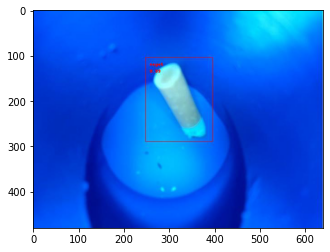

In [12]:
plt.imshow(im)
plt.show()

In [17]:
from google.colab import files
files.download("efficientdet-lite-bfc.tflite")
files.download("bfc-labels.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>